In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target


In [8]:
def data_profile(data):
    return {
        "shape": data.shape,
        "dtypes": data.dtypes,
        "missing_values": data.isnull().sum(),
        "statistics": data.describe()
    }

profile = data_profile(data)



In [9]:
print(profile)

{'shape': (150, 5), 'dtypes': sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object, 'missing_values': sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64, 'statistics':        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  

In [12]:
def recommend_algorithms(problem_type):
    if problem_type == "classification":
        return ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
    return []

algorithms = recommend_algorithms("classification")

In [13]:
print("Recommended Algorithms:", algorithms)

Recommended Algorithms: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import optuna

In [15]:

X = data.drop('species', axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(data.drop)

<bound method DataFrame.drop of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [17]:
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [19]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                 4.6               3.6                1.0               0.2
15                 5.7               4.4                1.5               0.4
65                 6.7               3.1                4.4               1.4
11                 4.8               3.4                1.6               0.2
42                 4.4               3.2                1.3               0.2
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[120 rows x 4 columns]


In [20]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
31                 5.4               3.4                1.5               0.4
64                 5.6               2.9                3.6               1.3
141                6.9               3.1                5.1               2.3
68                 6.2               2.2                4.5               1.5
82                 5.8               2.7                3.9               1.2
110                6.5               3.2                5.1               2.0
12                 4.8               3.0                1.4     

In [31]:
def optimize_model(X_train, y_train):
    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 10, 100)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3).mean()
        return score
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)
    return study.best_params

best_params = optimize_model(X_train, y_train)
print("Best Hyperparameters:", best_params)

[I 2024-09-25 11:13:05,359] A new study created in memory with name: no-name-f83898d6-3296-4343-bcc4-40ad932c7069
[I 2024-09-25 11:13:09,605] Trial 0 finished with value: 0.9333333333333332 and parameters: {'n_estimators': 41, 'max_depth': 5}. Best is trial 0 with value: 0.9333333333333332.
[I 2024-09-25 11:13:12,519] Trial 1 finished with value: 0.9416666666666668 and parameters: {'n_estimators': 51, 'max_depth': 4}. Best is trial 1 with value: 0.9416666666666668.
[I 2024-09-25 11:13:12,701] Trial 2 finished with value: 0.9416666666666668 and parameters: {'n_estimators': 51, 'max_depth': 8}. Best is trial 1 with value: 0.9416666666666668.
[I 2024-09-25 11:13:12,818] Trial 3 finished with value: 0.75 and parameters: {'n_estimators': 31, 'max_depth': 1}. Best is trial 1 with value: 0.9416666666666668.
[I 2024-09-25 11:13:12,975] Trial 4 finished with value: 0.9416666666666668 and parameters: {'n_estimators': 47, 'max_depth': 3}. Best is trial 1 with value: 0.9416666666666668.
[I 2024-09

Best Hyperparameters: {'n_estimators': 68, 'max_depth': 9}


In [35]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 70, 'max_depth': 6}


In [36]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [37]:
print(model)

RandomForestClassifier(max_depth=6, n_estimators=70)


In [38]:
print(predictions)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Visualization (optional):

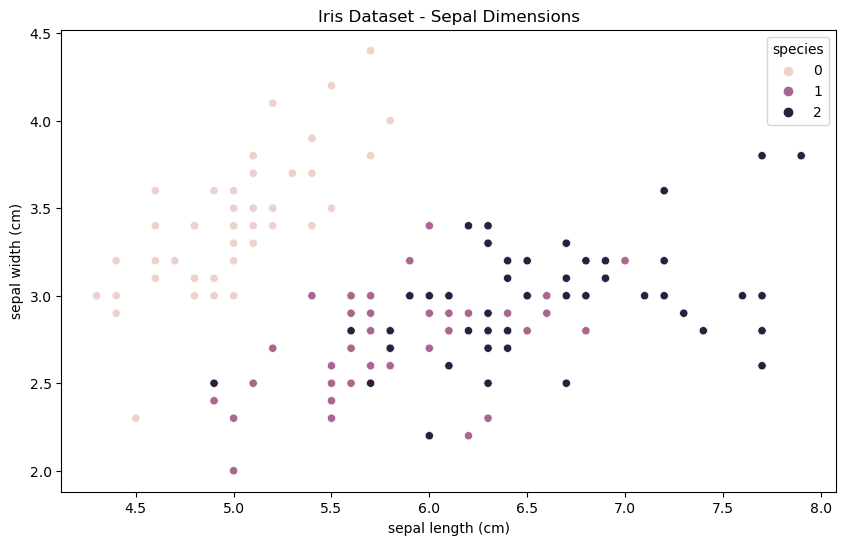

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['species'])
plt.title("Iris Dataset - Sepal Dimensions")
plt.show()


# Heatmap: To visualize the correlation between features.

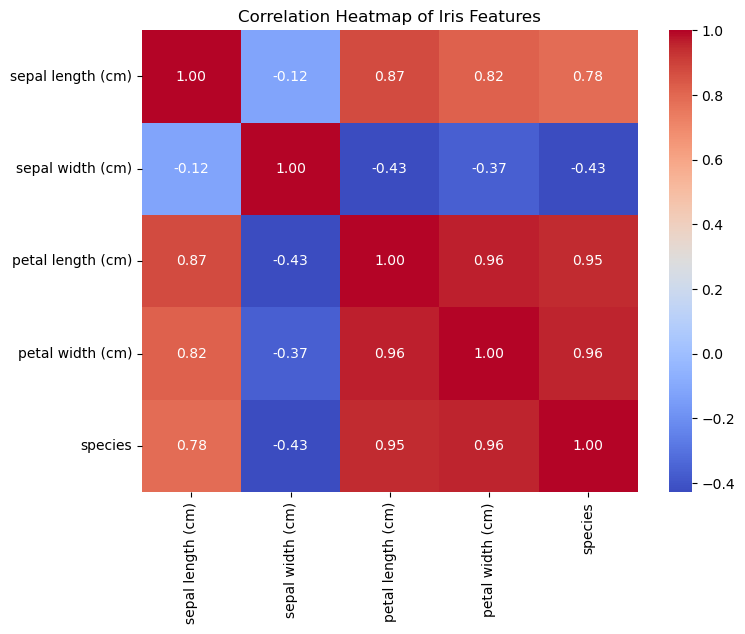

In [40]:
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# Violin Plot: To show the distribution and probability density of sepal lengths and widths across species


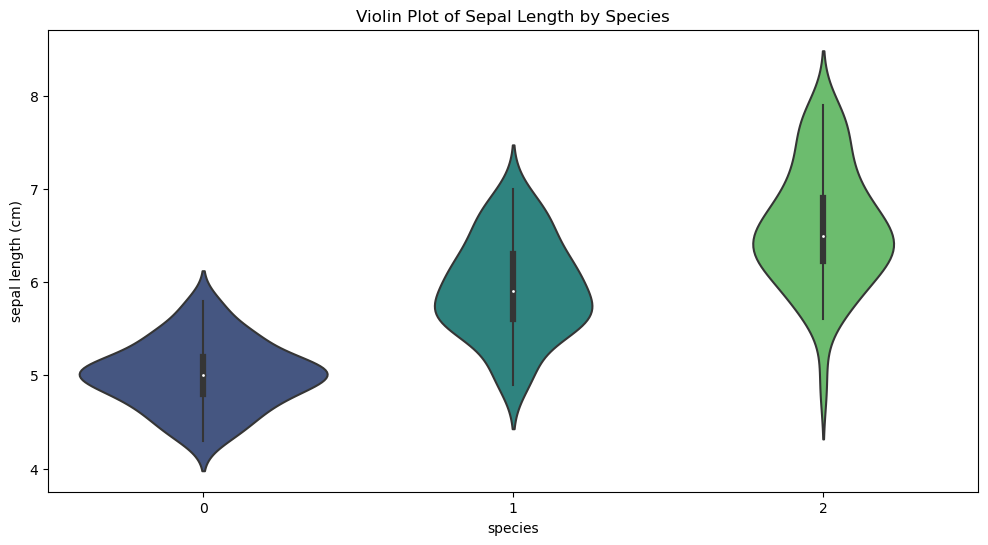

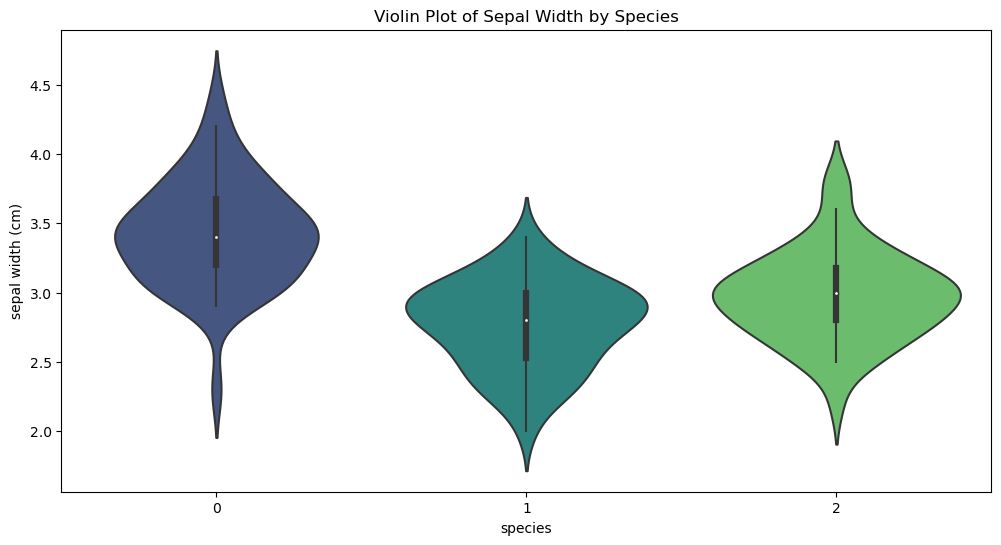

In [41]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal length (cm)', data=data, palette='viridis')
plt.title("Violin Plot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='sepal width (cm)', data=data, palette='viridis')
plt.title("Violin Plot of Sepal Width by Species")
plt.show()

# Histogram: To visualize the distribution of sepal lengths and widths.

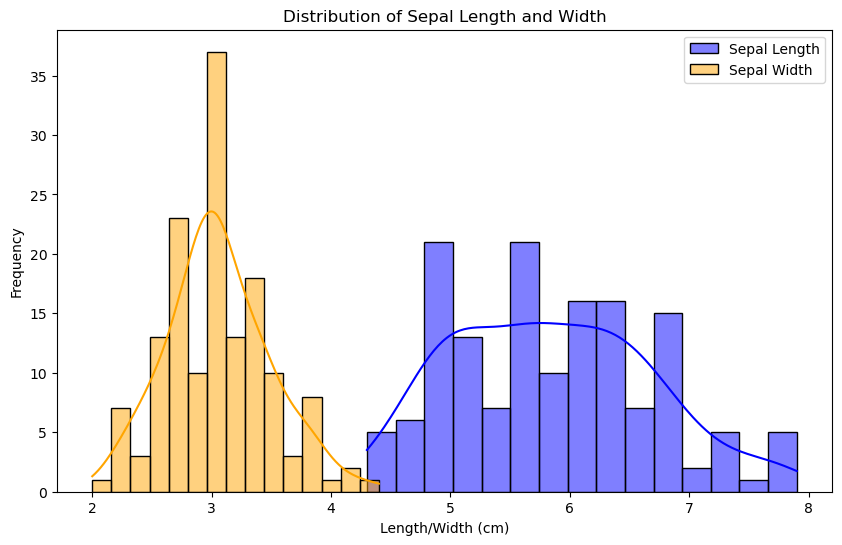

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sepal length (cm)'], bins=15, kde=True, color='blue', label='Sepal Length')
sns.histplot(data['sepal width (cm)'], bins=15, kde=True, color='orange', label='Sepal Width', alpha=0.5)
plt.title("Distribution of Sepal Length and Width")
plt.xlabel("Length/Width (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Box Plot: To compare the distribution of sepal lengths and widths across species.

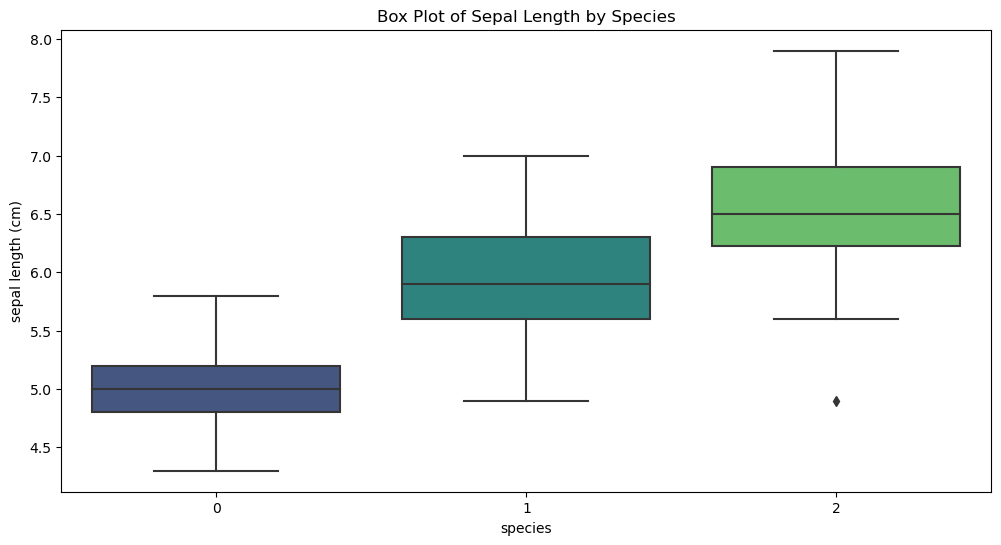

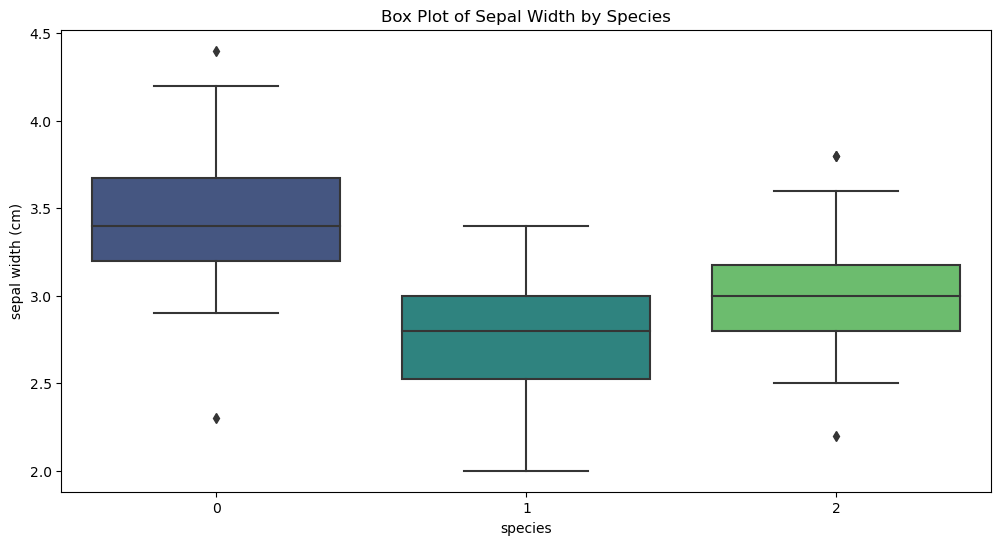

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data, palette='viridis')
plt.title("Box Plot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal width (cm)', data=data, palette='viridis')
plt.title("Box Plot of Sepal Width by Species")
plt.show()

# Pair Plot: To visualize pairwise relationships in the dataset.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


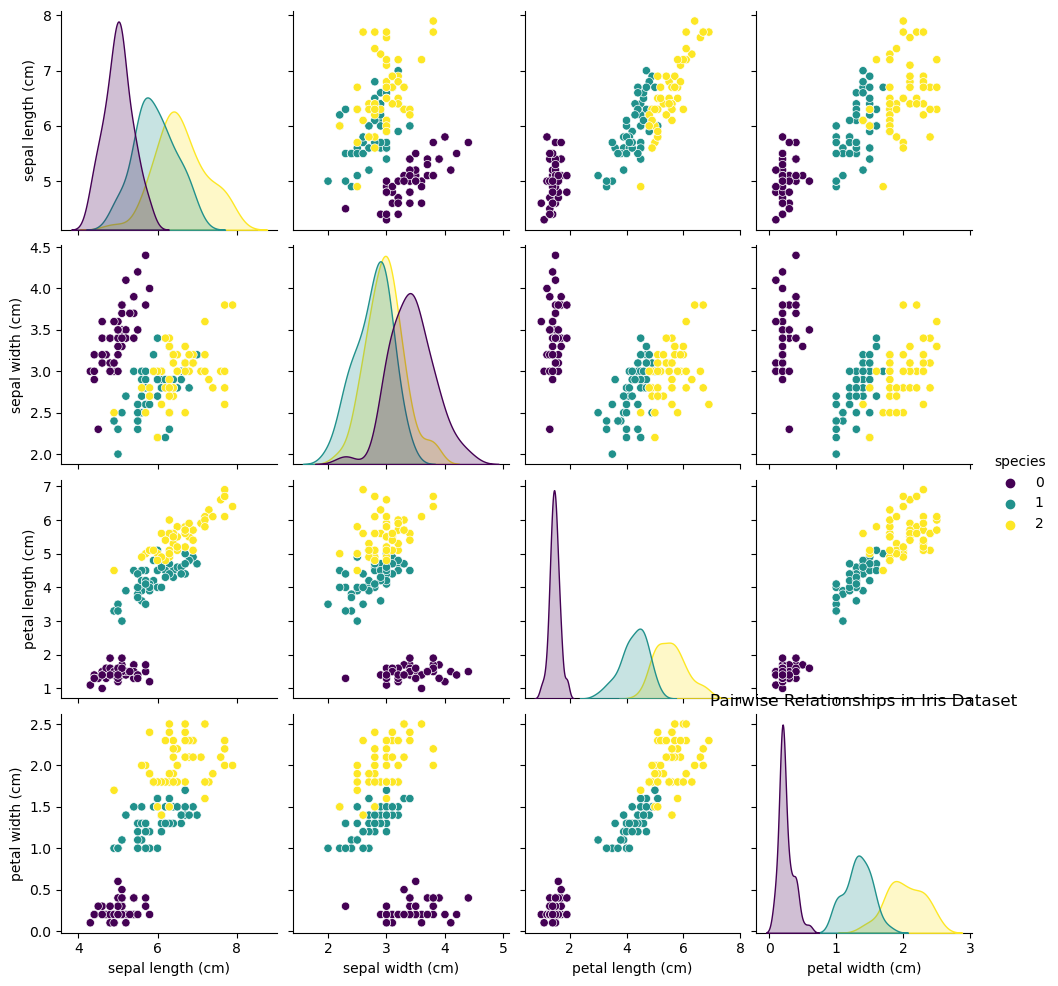

In [44]:
sns.pairplot(data, hue='species', palette='viridis')
plt.title("Pairwise Relationships in Iris Dataset")
plt.show()

# Scatter Plot: For showing the relationship between sepal length and sepal width, colored by species.

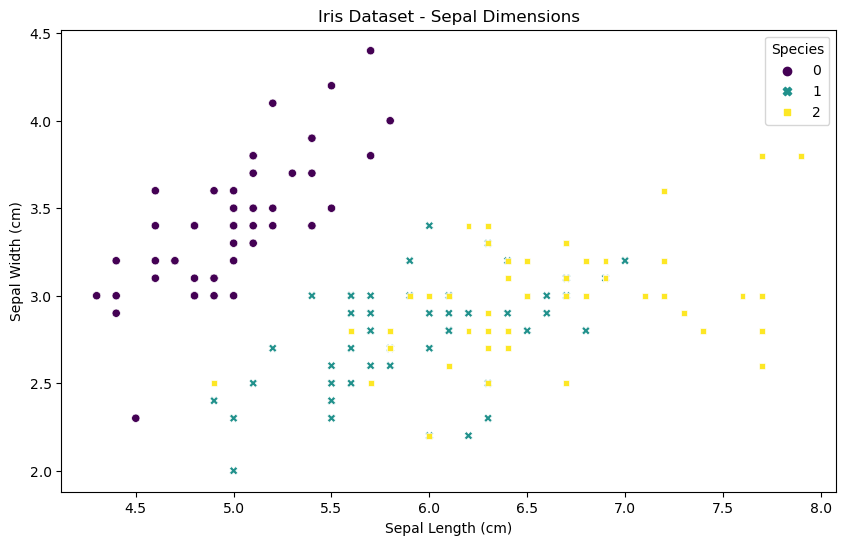

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['species'], palette='viridis', style=data['species'])
plt.title("Iris Dataset - Sepal Dimensions")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Species')
plt.show()

# Count Plot
Show the count of samples for each species.

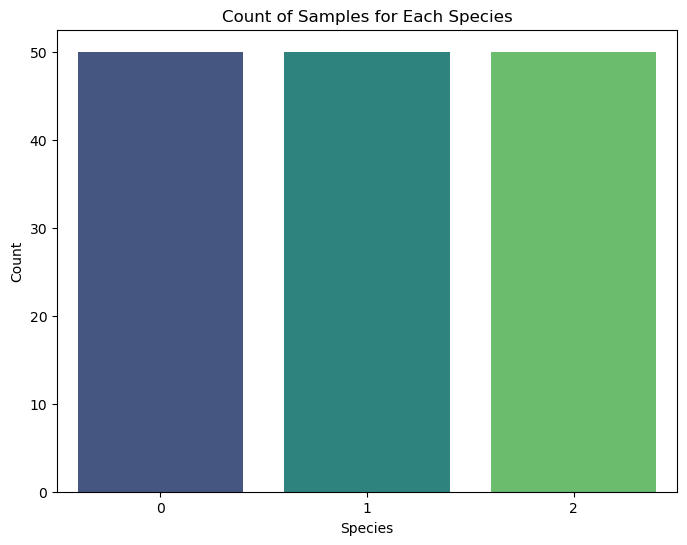

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=data, palette='viridis')
plt.title("Count of Samples for Each Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()